___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://images.squarespace-cdn.com/content/v1/558412b1e4b02581df4f2488/1517577616338-V13OHMPDLN33Y19EQ5R6/Beginner%27s+Guide+to+Time+Series+Forecasting+v3.png?format=1000w" width="500px" height="100px" />


# <font color= #8A0829> Preparación de datos para modelos de series de tiempo (continuación).</font>

<Strong> Objetivos </Strong>
- Entender las principales funciones que se deben de tener en cuenta cuando se está preparando un dataset para entrenar un modelo de series de tiempo.
> Referencias: 
    > - [Machine Learning for Time-Series with Python](https://www.packtpub.com/product/machine-learning-for-time-series-with-python/9781801819626)
___

# ¿Qué es el análisis de series temporales?

El término análisis de series temporales (TSA) hace referencia al enfoque estadístico de las series temporales o al análisis de tendencias y estacionalidad. A menudo se trata de una exploración y un análisis ad hoc que suele implicar la visualización de distribuciones, tendencias, patrones cíclicos y relaciones entre características, y entre características y el objetivo u objetivos.

En términos más generales, podemos decir que la TSA es más o menos un **análisis exploratorio de datos (EDA) específico de los datos de series temporales**. Sin embargo, esta comparación puede inducir a error, ya que el TSA puede incluir elementos tanto descriptivos como exploratorios.

Veamos rápidamente las diferencias entre el análisis descriptivo y el exploratorio: 
- El **análisis descriptivo** resume las características de un conjunto de datos.
- El **análisis exploratorio** busca patrones, tendencias o relaciones entre variables.

Todo el proceso, desde la carga de datos hasta el aprendizaje automático es muy iterativo y puede implicar múltiples instancias de TSA en distintos puntos.

A continuación se indican algunos pasos cruciales para trabajar con series temporales:
- Importación del conjunto de datos
- Limpieza de datos
- Comprensión de las variables
- Descubrir las relaciones entre variables
- Identificación de tendencias y estacionalidad
- Preprocesamiento (incluida la ingeniería de características)
- Entrenamiento de un modelo de aprendizaje automático

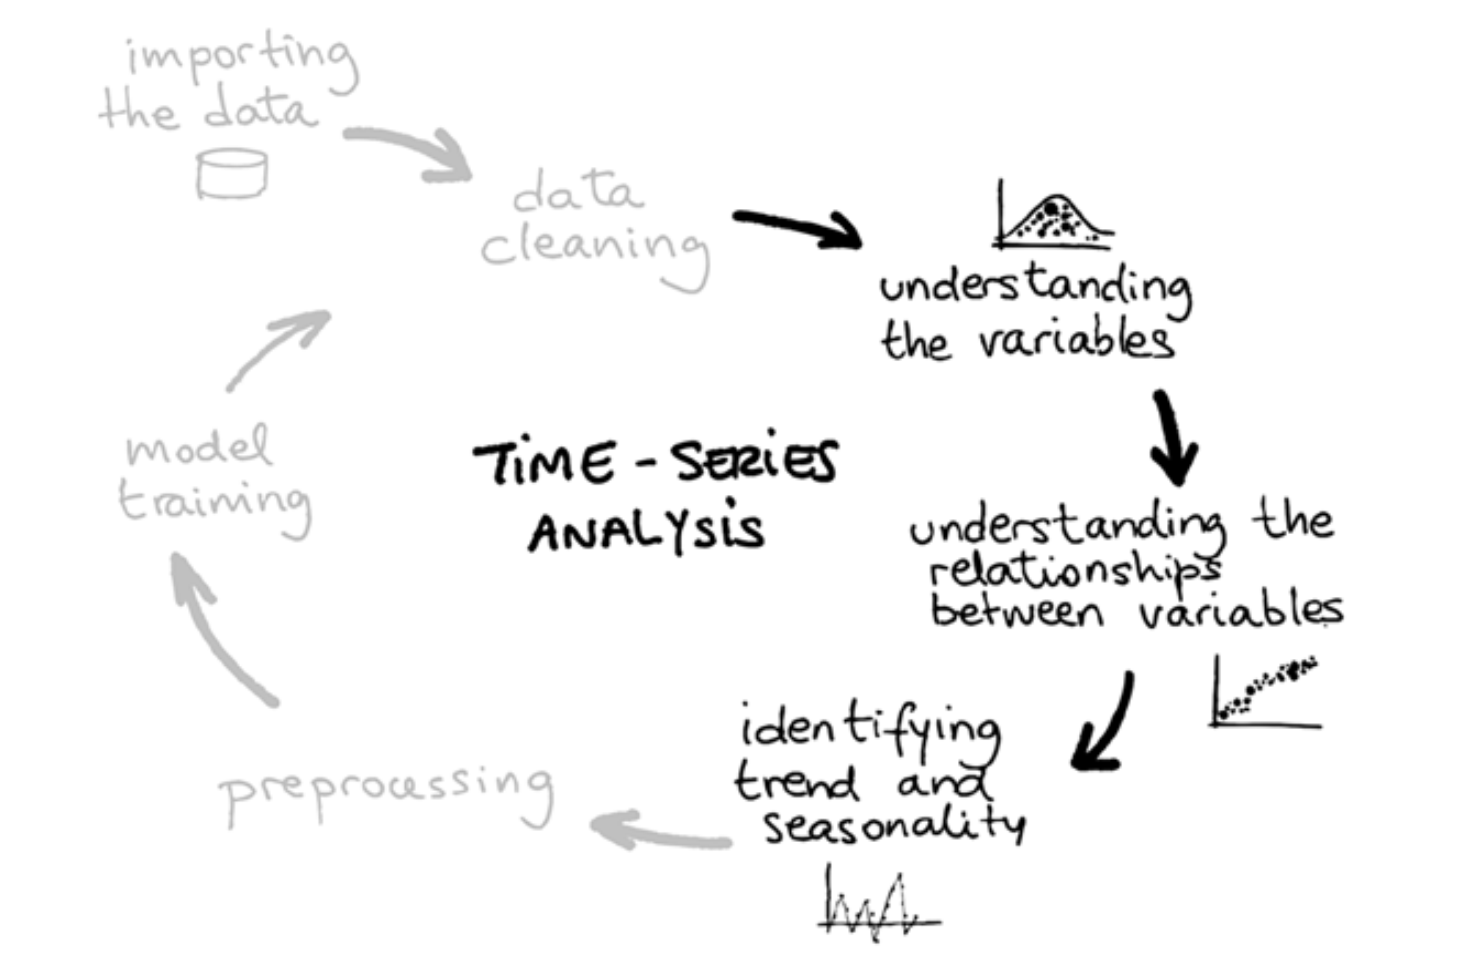

# 1. Trabajar con series temporales en Python

Python tiene muchas librerías y paquetes para series temporales, como `datetime`, `time`, `calendar`, `dateutil` y `pytz`, que pueden resultar muy confusos para los principiantes. Al mismo tiempo, hay muchos tipos de datos diferentes como `date`, `time`, `datetime`, `tzinfo`, `timedelta`, `relativedelta`, y más.

## Datetime
Los tipos de datos `date` y `datetime` no son tipos primitivos en Python como lo son los números (float e int), string, list, dictionary, tuple, o file. Para trabajar con objetos date y datetime, tenemos que importar datetime, una librería que forma parte de la Librería Estándar de Python, y de las librerías que vienen por defecto con CPython y otras distribuciones principales de Python.
 
`datetime` viene con objetos como date, datetime, time, y timedelta, entre otros. **La diferencia entre los objetos datetime y date es que el objeto datetime incluye información de tiempo además de una fecha**.
 Para obtener una fecha, podemos hacer lo siguiente:

In [2]:
from datetime import date

today = date.today()
today

datetime.date(2025, 2, 11)

In [3]:
other_date = date(2022, 1, 1) 
other_date

datetime.date(2022, 1, 1)

Si en su lugar queremos un objeto datetime (timestamp), también podemos hacerlo:

In [4]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2025, 2, 11, 20, 25, 56, 417548)

In [6]:
some_date = datetime(2022, 1, 1, 20, 00, 00, 0)
# Comparar con el formato .isoformat
some_date, some_date.isoformat()

(datetime.datetime(2022, 1, 1, 20, 0), '2022-01-01T20:00:00')

isoformato, abreviatura del formato ISO 8601, es una norma internacional para representar fechas y horas.

También podemos trabajar con diferencias horarias utilizando timedelta

In [11]:
from datetime import timedelta
year = timedelta(days=365)
year

datetime.timedelta(days=365)

Estos objetos timedelta pueden añadirse a otros objetos para realizar cálculos. Podemos hacer cálculos con un objeto timedelta, por ejemplo:

In [13]:
# Realizar operaciones con el objeto timedelta 
year  * 2 + some_date

datetime.datetime(2024, 1, 1, 20, 0)

La biblioteca datetime puede convertir entradas de string en tipos date y datetime y mostrar estos objetos como cadenas:

In [14]:
# Fecha con fromisoformat method
some_date = date.fromisoformat('2024-01-01')
some_date

datetime.date(2024, 1, 1)

In [20]:
some_date.strftime('%d-%m-%Y')

'01-01-2024'

In [18]:
# Usar el método strftime y el método fromisoformat
date.fromisoformat(some_date.strftime('%Y-%m-%d'))

datetime.date(2024, 1, 1)

Podemos formatear la salida con opciones de formato de string, por ejemplo así:

In [21]:
# %A: Día de la semana como nombre completo de la localidad.
# %d: Día del mes como un número decimal con ceros.
# %B: Mes como nombre completo de la localidad.
# %Y: Año con siglo como número decimal.
some_date.strftime('%A %d. %B %Y')

'Monday 01. January 2024'

Para más detalles acerca de todas las opciones incluídas en la función `strftime` se pueden consultar en el siguiente enlace: https://strftime.org/

| **Formato String** |                                                                                 **Significado**                                                                                |
|:------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|         %A         |                                                             Día de la semana como nombre completo de la localidad.                                                             |
|         %d         | Día del mes como un número decimal con ceros.                                                                                                                                  |
|         %Y         | Año con siglo como número decimal                                                                                                                                              |
|         %M         | Minuto como un número decimal con ceros.                                                                                                                                       |
|         %m         | Mes como un número decimal con ceros.                                                                                                                                          |
|         %H         | Hora (reloj de 24 horas) como un número decimal con ceros.                                                                                                                     |
|         %B         | Mes como nombre completo de la localidad                                                                                                                                       |
|         %W         | Número de semana del año (lunes como primer día  de la semana) como número decimal. Todos los días de un nuevo año que  preceden al primer lunes se consideran en la semana 0. |

$$
\textbf{Figura 1}. \text{Formatos más usados en fechas.}
$$

## Pandas

`pandas` viene con importantes funcionalidades de series temporales como la generación de rangos de fechas, conversión de frecuencias, estadísticas de ventanas móviles, desplazamiento de fechas y desfase.

In [26]:
import pandas as pd

# 1. Rango temporal
pd.date_range(start=date.today(), periods=20, freq='W')

DatetimeIndex(['2025-02-16', '2025-02-23', '2025-03-02', '2025-03-09',
               '2025-03-16', '2025-03-23', '2025-03-30', '2025-04-06',
               '2025-04-13', '2025-04-20', '2025-04-27', '2025-05-04',
               '2025-05-11', '2025-05-18', '2025-05-25', '2025-06-01',
               '2025-06-08', '2025-06-15', '2025-06-22', '2025-06-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [27]:
# 2. Series de rango de tiempo
pd.Series(pd.date_range('2021', freq='M', periods=20))

0    2021-01-31
1    2021-02-28
2    2021-03-31
3    2021-04-30
4    2021-05-31
5    2021-06-30
6    2021-07-31
7    2021-08-31
8    2021-09-30
9    2021-10-31
10   2021-11-30
11   2021-12-31
12   2022-01-31
13   2022-02-28
14   2022-03-31
15   2022-04-30
16   2022-05-31
17   2022-06-30
18   2022-07-31
19   2022-08-31
dtype: datetime64[ns]

Podemos encontrar más detalles acerca de los diferentes strings que podemos usar para el atributo `freq` en el siguiente enlace: 
https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

Conversión a objetos de fecha u hora a partir de cadenas o columnas separadas:

In [28]:
df = pd.DataFrame({'years': [2021, 2022],
'months': [3, 4],
'days': [24, 25]}
)
df

,years,months,days
0,2021,3,24
1,2022,4,25


In [31]:
# to_datetime a un DF
ts1 = pd.to_datetime(df)
ts1

0   2021-03-24
1   2022-04-25
dtype: datetime64[ns]

In [32]:
# to_datetime especificando el format
ts2 = pd.to_datetime('20210106', format='%Y%m%d')
ts2

Timestamp('2021-01-06 00:00:00')

In [38]:
# 3. Método rolling
s = pd.Series([1, 2, 3, 4, 5])
s.rolling(window=2).std()

0         NaN
1    0.707107
2    0.707107
3    0.707107
4    0.707107
dtype: float64

In [41]:
import numpy as np
rng = pd.date_range('2021-03-24', '2021-09-01', freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2021-03-24    2.306716
2021-03-25   -0.087896
2021-03-26   -0.867810
2021-03-27    0.196515
2021-03-28    0.286296
                ...   
2021-08-28    0.772875
2021-08-29    1.058100
2021-08-30    0.686702
2021-08-31    0.730371
2021-09-01   -0.309704
Freq: D, Length: 162, dtype: float64

In [42]:
ts['2021-03-28':'2021-03-31'] 

2021-03-28    0.286296
2021-03-29    0.001929
2021-03-30   -0.361399
2021-03-31    0.544632
Freq: D, dtype: float64

In [45]:
# 4. Método shift
ts.shift(-1)

2021-03-24   -0.087896
2021-03-25   -0.867810
2021-03-26    0.196515
2021-03-27    0.286296
2021-03-28    0.001929
                ...   
2021-08-28    1.058100
2021-08-29    0.686702
2021-08-30    0.730371
2021-08-31   -0.309704
2021-09-01         NaN
Freq: D, Length: 162, dtype: float64

In [44]:
# Los primeros 10 valores de la serie
ts[:10]

2021-03-24    2.306716
2021-03-25   -0.087896
2021-03-26   -0.867810
2021-03-27    0.196515
2021-03-28    0.286296
2021-03-29    0.001929
2021-03-30   -0.361399
2021-03-31    0.544632
2021-04-01   -0.059953
2021-04-02    0.981599
Freq: D, dtype: float64

### Alias de período
Se asignan varios alias de cadenas a frecuencias de series temporales comunes y útiles. Nos referiremos a estos alias como alias de período.

| Alias |       Description      |
|:-----:|:----------------------:|
|   B   | business day frequency |
|   D   | calendar day frequency |
|   W   |    weekly frequency    |
|   M   |    monthly frequency   |
|   Q   |   quarterly frequency  |
|   Y   |    yearly frequency    |
|   h   |    hourly frequency    |
|  min  |   minutely frequency   |
|   s   |   secondly frequency   |
|   ms  |      milliseconds      |
|   us  |      microseconds      |
|   ns  |       nanoseconds      |

In [50]:
ts[10:50]

2021-04-03   -1.266630
2021-04-04   -0.167521
2021-04-05   -0.332538
2021-04-06    0.728980
2021-04-07   -1.338648
2021-04-08    0.657151
2021-04-09   -2.466303
2021-04-10    1.371277
2021-04-11    0.107390
2021-04-12   -0.769498
2021-04-13   -0.168700
2021-04-14   -0.148659
2021-04-15    0.063062
2021-04-16    1.074592
2021-04-17   -0.798233
2021-04-18   -0.611871
2021-04-19    0.164809
2021-04-20   -1.577332
2021-04-21    0.090996
2021-04-22   -0.482998
2021-04-23   -2.364099
2021-04-24   -1.034220
2021-04-25    0.228446
2021-04-26    0.485298
2021-04-27   -0.418652
2021-04-28   -0.731046
2021-04-29   -2.065667
2021-04-30   -0.367641
2021-05-01    0.516879
2021-05-02   -0.373387
2021-05-03   -0.108875
2021-05-04   -0.412968
2021-05-05   -0.357074
2021-05-06    0.677921
2021-05-07    0.391426
2021-05-08   -1.431021
2021-05-09    0.288571
2021-05-10   -1.233770
2021-05-11    0.126785
2021-05-12    1.344185
Freq: D, dtype: float64

In [47]:
# 5. Cambiar la frecuencia de la serie de tiempo (asfreq)
ts.asfreq('M')

2021-03-31    0.544632
2021-04-30   -0.367641
2021-05-31   -0.168635
2021-06-30    0.975097
2021-07-31   -0.918228
2021-08-31    0.730371
Freq: M, dtype: float64

In [52]:
# Usar freq cómo string (30s) y fill_value attribute 
ts.asfreq(freq='30S', fill_value=9.0)[:20]

2021-03-24 00:00:00    2.306716
2021-03-24 00:00:30    9.000000
2021-03-24 00:01:00    9.000000
2021-03-24 00:01:30    9.000000
2021-03-24 00:02:00    9.000000
2021-03-24 00:02:30    9.000000
2021-03-24 00:03:00    9.000000
2021-03-24 00:03:30    9.000000
2021-03-24 00:04:00    9.000000
2021-03-24 00:04:30    9.000000
2021-03-24 00:05:00    9.000000
2021-03-24 00:05:30    9.000000
2021-03-24 00:06:00    9.000000
2021-03-24 00:06:30    9.000000
2021-03-24 00:07:00    9.000000
2021-03-24 00:07:30    9.000000
2021-03-24 00:08:00    9.000000
2021-03-24 00:08:30    9.000000
2021-03-24 00:09:00    9.000000
2021-03-24 00:09:30    9.000000
Freq: 30S, dtype: float64

In [53]:
# date_range con freq como "2h20min"
start = date.today()
pd.date_range(start, periods=10, freq='2h20min')

DatetimeIndex(['2025-02-11 00:00:00', '2025-02-11 02:20:00',
               '2025-02-11 04:40:00', '2025-02-11 07:00:00',
               '2025-02-11 09:20:00', '2025-02-11 11:40:00',
               '2025-02-11 14:00:00', '2025-02-11 16:20:00',
               '2025-02-11 18:40:00', '2025-02-11 21:00:00'],
              dtype='datetime64[ns]', freq='140T')

In [65]:
ts[:8].mean()

0.2523727823706707

In [64]:
# 6. Método resample para modificar temporalidad de series de tiempo resample(freq).FUNC
ts.resample('M').mean()

2021-03-31    0.252373
2021-04-30   -0.373887
2021-05-31   -0.012914
2021-06-30   -0.508886
2021-07-31   -0.053432
2021-08-31    0.140759
2021-09-30   -0.309704
Freq: M, dtype: float64

In [67]:
ts['2021-03-24': '2021-03-31'].mean()

0.2523727823706707

In [68]:
# 7. Método pd.to_timedelta y pd.Timedelta
help(pd.to_timedelta)

Help on function to_timedelta in module pandas.core.tools.timedeltas:

to_timedelta(arg: 'str | int | float | timedelta | list | tuple | range | ArrayLike | Index | Series', unit: 'UnitChoices | None' = None, errors: 'DateTimeErrorChoices' = 'raise') -> 'Timedelta | TimedeltaIndex | Series'
    Convert argument to timedelta.
    
    Timedeltas are absolute differences in times, expressed in difference
    units (e.g. days, hours, minutes, seconds). This method converts
    an argument from a recognized timedelta format / value into
    a Timedelta type.
    
    Parameters
    ----------
    arg : str, timedelta, list-like or Series
        The data to be converted to timedelta.
    
        .. versionchanged:: 2.0
            Strings with units 'M', 'Y' and 'y' do not represent
            unambiguous timedelta values and will raise an exception.
    
    unit : str, optional
        Denotes the unit of the arg for numeric `arg`. Defaults to ``"ns"``.
    
        Possible values:
  

In [72]:
# Crear un timedelta con una unidad de minuto (unsando pd.to_timedelta)
pd.to_timedelta(1, unit='minute')

Timedelta('0 days 00:01:00')

In [74]:
# Crear un timedelta con unidades de semana y otra con unidades de h (usando pd.Timedelta)
pd.Timedelta(7, unit='W'), pd.Timedelta(2.5, unit='h')

(Timedelta('49 days 00:00:00'), Timedelta('0 days 02:30:00'))

In [75]:
# 8. Descomponer datos de fechas con índices en formato datetime
ts.index

DatetimeIndex(['2021-03-24', '2021-03-25', '2021-03-26', '2021-03-27',
               '2021-03-28', '2021-03-29', '2021-03-30', '2021-03-31',
               '2021-04-01', '2021-04-02',
               ...
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-28', '2021-08-29', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', length=162, freq='D')

In [76]:
# Convertir Series to DataFrame
ts_df = ts.to_frame('data')
ts_df

,data
2021-03-24,2.306716
2021-03-25,-0.087896
2021-03-26,-0.867810
2021-03-27,0.196515
2021-03-28,0.286296
...,...
2021-08-28,0.772875
2021-08-29,1.058100
2021-08-30,0.686702
2021-08-31,0.730371


In [77]:
# Obtener la semana
ts_df['week'] = ts_df.index.isocalendar().week

# Obtener el día del mes
ts_df["day_of_month"] = ts_df.index.day

# Obtener el mes
ts_df["month"] = ts_df.index.month
ts_df.head()

,data,week,day_of_month,month
2021-03-24,2.306716,12,24,3
2021-03-25,-0.087896,12,25,3
2021-03-26,-0.867810,12,26,3
2021-03-27,0.196515,12,27,3
2021-03-28,0.286296,12,28,3


# Ejemplo de aplicación 1:

Tenemos el siguiente dataset:

In [78]:
url = 'https://raw.githubusercontent.com/tidyverts/tsibbledata/master/data-raw/vic_elec/VIC2015/demand.csv'

df = pd.read_csv(url)

df.head()

,Date,Period,OperationalLessIndustrial,Industrial
0,37257,1,3535.867064,1086.132936
1,37257,2,3383.499028,1088.500972
2,37257,3,3655.527552,1084.472448
3,37257,4,3510.446636,1085.553364
4,37257,5,3294.697156,1081.302844


Las entradas en la columna de fecha son números enteros que representan el número de días desde 1899-12-30. Los números enteros del período se refieren a intervalos de 30 minutos en un día de 24 horas, por lo que hay 48 para cada día.

1. Extraigamos la fecha y la fecha y hora.

In [81]:
# Procesar información para construir fecha
# 1. Usar la fecha base
# 2. Usar la columna Date para construir un objeto Timedelta ('d')
# 3. Usar la columna Period para construir un objeto Timedelta ('m')
df['date'] = df.apply(lambda x: 
                      pd.to_datetime('1899-12-30') + \
                      pd.Timedelta(x['Date'], unit='d') + \
                      pd.Timedelta(x['Period'] - 1, unit='m') * 30, axis=1
)
df.head()

,Date,Period,OperationalLessIndustrial,Industrial,date
0,37257,1,3535.867064,1086.132936,2002-01-01 00:00:00
1,37257,2,3383.499028,1088.500972,2002-01-01 00:30:00
2,37257,3,3655.527552,1084.472448,2002-01-01 01:00:00
3,37257,4,3510.446636,1085.553364,2002-01-01 01:30:00
4,37257,5,3294.697156,1081.302844,2002-01-01 02:00:00


In [85]:
# Selección de las variables de interés 
timeseries = df[['OperationalLessIndustrial', 'date']].copy()
timeseries.columns = ['y', 'date']

timeseries.set_index('date', inplace=True)
timeseries

,y
date,
2002-01-01 00:00:00,3535.867064
2002-01-01 00:30:00,3383.499028
2002-01-01 01:00:00,3655.527552
2002-01-01 01:30:00,3510.446636
2002-01-01 02:00:00,3294.697156
...,...
2015-03-01 21:30:00,NaN
2015-03-01 22:00:00,NaN
2015-03-01 22:30:00,NaN


In [86]:
# Hacer un re muestreo de los datos para que queden de forma horaria (sumarlos) 'H' y sumar
timeseries = timeseries.resample('H').sum()
timeseries.head()

,y
date,
2002-01-01 00:00:00,6919.366092
2002-01-01 01:00:00,7165.974188
2002-01-01 02:00:00,6406.542994
2002-01-01 03:00:00,5815.537828
2002-01-01 04:00:00,5497.732922


In [88]:
# Cuantificar cuántos días distintos se tienen en nuestra base (asfreq)
timeseries.asfreq('D').shape

(4808, 1)

In [89]:
# Tomar sólo los primeros 149 días del 2012
start_date = pd.to_datetime('2012-01-01')
end_date = start_date + pd.Timedelta(149, unit='d')

mask = (timeseries.index >= start_date) & (timeseries.index <= end_date)

final_timeseries = timeseries[mask]
final_timeseries

,y
date,
2012-01-01 00:00:00,7926.529376
2012-01-01 01:00:00,7901.826990
2012-01-01 02:00:00,7255.721350
2012-01-01 03:00:00,6792.503352
2012-01-01 04:00:00,6635.984460
...,...
2012-05-28 20:00:00,11581.352324
2012-05-28 21:00:00,10835.243698
2012-05-28 22:00:00,10024.835748


In [90]:
# Validar que las fechas si coinciden con la cantidad de días seleccionados
idx = final_timeseries.index
idx[-1] - idx[0]

Timedelta('149 days 00:00:00')

In [92]:
# Crear una columna con el número de la semana (isocalendar().week)
final_timeseries['week'] = final_timeseries.index.isocalendar().week

# Crear columna con el día de la semana (day)
final_timeseries['day'] = final_timeseries.index.day

# Crear columna con el número del mes
final_timeseries['month'] = final_timeseries.index.month

final_timeseries

/var/folders/bd/fxcdmf115rn5cn67jzd5_pqm0000gn/T/ipykernel_64566/1665868204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_timeseries['week'] = final_timeseries.index.isocalendar().week
/var/folders/bd/fxcdmf115rn5cn67jzd5_pqm0000gn/T/ipykernel_64566/1665868204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_timeseries['day'] = final_timeseries.index.day
/var/folders/bd/fxcdmf115rn5cn67jzd5_pqm0000gn/T/ipykernel_64566/1665868204.py:8: SettingWithCopyWarning: 
A value is trying to be set

,y,week,day,month
date,,,,
2012-01-01 00:00:00,7926.529376,52,1,1
2012-01-01 01:00:00,7901.826990,52,1,1
2012-01-01 02:00:00,7255.721350,52,1,1
2012-01-01 03:00:00,6792.503352,52,1,1
2012-01-01 04:00:00,6635.984460,52,1,1
...,...,...,...,...
2012-05-28 20:00:00,11581.352324,22,28,5
2012-05-28 21:00:00,10835.243698,22,28,5
2012-05-28 22:00:00,10024.835748,22,28,5


<Axes: >

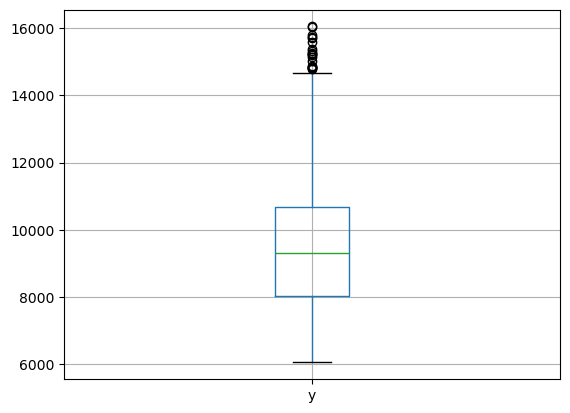

In [93]:
# Boxplot de la variable de salida
final_timeseries['y'].to_frame('y').boxplot()

In [94]:
import matplotlib.pyplot as plt

/var/folders/bd/fxcdmf115rn5cn67jzd5_pqm0000gn/T/ipykernel_64566/161722723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_timeseries['logy'] = np.log(final_timeseries['y'])


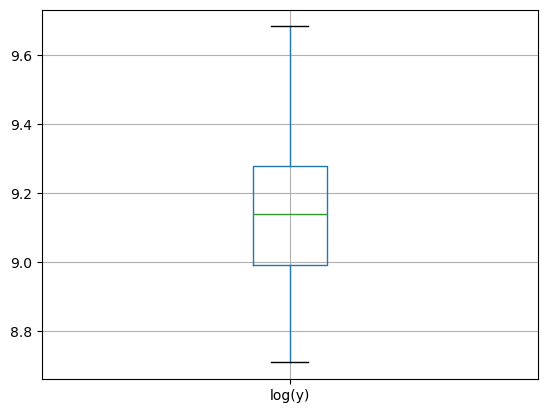

In [95]:
final_timeseries['logy'] = np.log(final_timeseries['y'])
final_timeseries['logy'].to_frame('log(y)').boxplot()
plt.show()

# 2. Preprocesar series de tiempo

## ¿Qué es el preprocesamiento?

Cualquiera que haya trabajado alguna vez en una empresa en un proyecto de aprendizaje automático sabe que los datos del mundo real son desordenados. A menudo se agregan a partir de múltiples fuentes o utilizando múltiples plataformas o dispositivos de grabación, y son incompletos e inconsistentes. En el preprocesamiento, queremos mejorar la calidad de los datos para aplicar con éxito un modelo de aprendizaje automático.

El preprocesamiento de datos incluye el siguiente conjunto de técnicas:
- Transformación de características
- Escalado
- Transformación de potencia/log
- Imputación
- Ingeniería de características

### Scaling

Algunas características tienen límites naturales, como la edad de una persona o el año de fabricación de un producto. Si estos rangos difieren entre las características, algunos tipos de modelos (de nuevo, sobre todo los modelos lineales) tienen problemas con esto, prefiriendo rangos similares y medias similares.

Hay dos métodos de escalado muy comunes llamados el escalado mín-máx y la normalización z-score.

- **El escalado mín-máx** implica restringir el rango de la característica dentro de dos constantes, a y b. Esto se define de la siguiente manera:
$$
x'= a + \frac{(x - \min(x)) \cdot (b-a)}{\max(x) - \min(x)}
$$
En el caso especial de que $a$ sea 0 y $b$ sea 1, esto restringe el rango de la característica entre 0 y 1. Este escalado lo realiza sklearn con sun función `MinMaxScaler` [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

- **La normalización** de la Z-score consiste en establecer la media de la característica en 0 y la varianza en 1 (varianza unitaria) así:
$$
x' = \frac{x - \bar{x}}{\sigma}
$$
En el caso de que x provenga de una distribución gaussiana, $x'$ es una distribución normal estándar. Este escalado lo realiza sklearn con sun función `StandardScaler` [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

### Log y Power Transformations

- **Log**: recuerde que el intervalo entre 0 y 1 se asigna a números negativos ($-\infty$,0), mientras que los números x>=1 se comprimen en el intervalo positivo. La elección del
 logaritmo suele estar entre el natural y el de base 10, pero puede ser cualquiera que sirva para que tu característica se acerque más a la distribución simétrica en forma de campana, que es la distribución normal
    
    La transformación logarítmica puede utilizarse para reducir el sesgo de una distribución.
    
    Yo recomendaría tener cuidado con las transformaciones de datos. Debería inspeccionar los datos antes y después de la transformación. Usted quiere que la varianza de su característica capture las del objetivo, por lo que debe asegurarse de que no está perdiendo resolución..
    
Las transformaciones de potencia suelen aplicarse para **transformar los datos de su distribución original a algo que se parezca más a una distribución normal**. 
- **Power Transformations**: En muchos escenarios de modelado, es deseable la normalidad de las características en un conjunto de datos. Las transformaciones de potencia son una familia de transformaciones monotónicas paramétricas que tienen como objetivo mapear datos de cualquier distribución a una distribución tan cercana a Gauss como sea posible para estabilizar la varianza y minimizar la asimetría.
    - La transformada de **Yeo-Johnson** viene dada por:
    $$
    \begin{split}x_i^{(\lambda)} =
    \begin{cases}
     [(x_i + 1)^\lambda - 1] / \lambda & \text{if } \lambda \neq 0, x_i \geq 0, \\[8pt]
    \ln{(x_i + 1)} & \text{if } \lambda = 0, x_i \geq 0 \\[8pt]
    -[(-x_i + 1)^{2 - \lambda} - 1] / (2 - \lambda) & \text{if } \lambda \neq 2, x_i < 0, \\[8pt]
     - \ln (- x_i + 1) & \text{if } \lambda = 2, x_i < 0
    \end{cases}\end{split}
    $$
    Yeo-Johnson se puede aplicar a datos con valores tanto positivos como negativos.
    - Mientras que la transformada de **Box-Cox** viene dada por:
    $$
    \begin{split}x_i^{(\lambda)} =
    \begin{cases}
    \dfrac{x_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0, \\[8pt]
    \ln{(x_i)} & \text{if } \lambda = 0,
    \end{cases}\end{split}
    $$
    Box-Cox solo se puede aplicar a datos estrictamente positivos.
    
Sklearn tiene implementado estos dos métodos de escalamiento usando la función `power_transform` [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html).

# Ejemplo 2 transformaciones

Vamos a crear una distribución 

In [106]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

pts = 10000
vals = np.random.lognormal(0, 1.0, pts)

In [98]:
plt.hist(vals, bins=20, density=True)
plt.yscale("log")
plt.ylabel("frequency")
plt.xlabel("value range");

In [99]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest

vals_mm = MinMaxScaler(vals)
scaler = StandardScaler()
vals_ss = scaler.fit_transform(vals.reshape(-1, 1))

_, p = normaltest(vals_ss.squeeze())
print(f"significance standard scaler: {p:.2f}")

significance standard scaler: 0.00


In [100]:
_, p = normaltest(vals_mm.feature_range)
print(f"significance min max scaler: {p:.2f}")

significance min max scaler: 0.00


### Realizando transformación logarítmica

In [107]:
# Realizar el test de kolmogorov-Smirnov para probar normalidad
from statsmodels.stats.diagnostic import kstest_normal

log_transformed = np.log(vals)
_, p = kstest_normal(log_transformed)  # stats.normaltest
print(f"significance: {p:.2f}")

significance: 0.31


In [108]:
print('media:', np.mean(log_transformed), 'std:', np.std(log_transformed))

media: -0.01843372015826582 std: 0.9875565681761207


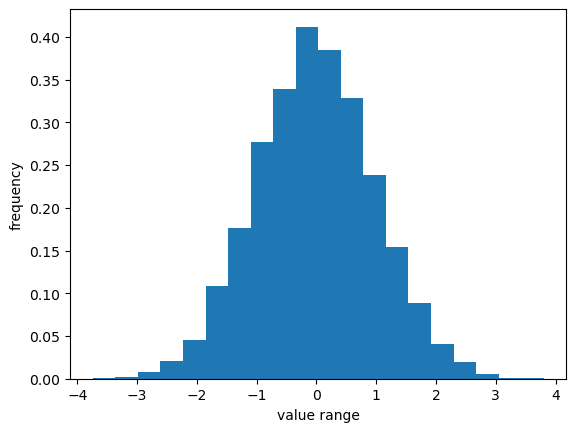

In [109]:
plt.figure()
plt.hist(log_transformed, bins=20, density=True)
#plt.yscale("log")
plt.ylabel("frequency")
plt.xlabel("value range")
plt.show()

### Realizando transformación Box-cox

In [110]:
from sklearn.preprocessing import power_transform

vals_bc = power_transform(vals.reshape(-1, 1), method='box-cox')

_, p = kstest_normal(vals_bc.squeeze())
print(f"significance: {p:.2f}")

significance: 0.52


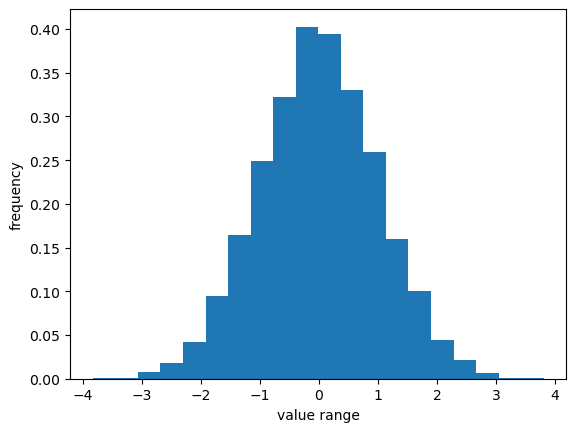

In [111]:
plt.hist(vals_bc, bins=20, density=True)
plt.ylabel("frequency")
plt.xlabel("value range")
plt.show()

In [112]:
vals_yj = power_transform(vals.reshape(-1, 1), method='yeo-johnson')

_, p = kstest_normal(vals_yj.squeeze())
print(f"significance: {p:.2f}")

significance: 0.00


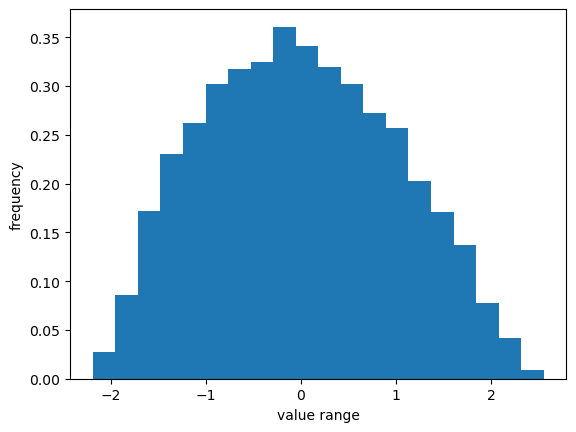

In [113]:
plt.hist(vals_yj, bins=20, density=True)
plt.ylabel("frequency")
plt.xlabel("value range")
plt.show()

**Workalendar** es un módulo de Python que ofrece clases capaces de manejar calendarios, enumerar días festivos legales/religiosos y brinda funciones de cálculo relacionadas con la jornada laboral. Para instalar ejecuten el siguiente comando:

`%conda install -c conda-forge workalendar`

In [ ]:
%conda install -c conda-forge workalendar

In [114]:
from workalendar.europe import France
cal = France()

cal.holidays(2012)

[(datetime.date(2012, 1, 1), 'New year'),
 (datetime.date(2012, 4, 9), 'Easter Monday'),
 (datetime.date(2012, 5, 1), 'Labour Day'),
 (datetime.date(2012, 5, 8), 'Victory in Europe Day'),
 (datetime.date(2012, 5, 17), 'Ascension Thursday'),
 (datetime.date(2012, 5, 28), 'Whit Monday'),
 (datetime.date(2012, 7, 14), 'Bastille Day'),
 (datetime.date(2012, 8, 15), 'Assumption of Mary to Heaven'),
 (datetime.date(2012, 11, 1), 'All Saints Day'),
 (datetime.date(2012, 11, 11), 'Armistice Day'),
 (datetime.date(2012, 12, 25), 'Christmas Day')]

In [115]:
cal.is_working_day(date(2012, 12, 25)) # Navidad

False

In [116]:
cal.is_working_day(date(2012, 12, 30)) # Domingo

False

> Para una documentación más completa y un uso avanzado, vaya a la documentación oficial workalendar [link](https://workalendar.github.io/workalendar/).

In [117]:
from workalendar.america import Mexico, Colombia
cal_mx = Mexico()

cal_mx.holidays()

[(datetime.date(2025, 1, 1), 'New year'),
 (datetime.date(2025, 2, 3), 'Constitution Day'),
 (datetime.date(2025, 3, 17), "Benito Juárez's birthday"),
 (datetime.date(2025, 5, 1), 'Labour Day'),
 (datetime.date(2025, 9, 16), 'Independence Day'),
 (datetime.date(2025, 11, 17), 'Revolution Day'),
 (datetime.date(2025, 12, 25), 'Christmas Day'),
 (datetime.date(2025, 12, 31), 'New Year Day substitute')]

In [118]:
cal_co = Colombia()

cal_co.holidays()

[(datetime.date(2025, 1, 1), 'New year'),
 (datetime.date(2025, 1, 6), 'Epiphany'),
 (datetime.date(2025, 3, 24), 'Saint Joseph'),
 (datetime.date(2025, 4, 13), 'Palm Sunday'),
 (datetime.date(2025, 4, 17), 'Holy Thursday'),
 (datetime.date(2025, 4, 18), 'Good Friday'),
 (datetime.date(2025, 4, 20), 'Easter Sunday'),
 (datetime.date(2025, 5, 1), 'Labour Day'),
 (datetime.date(2025, 6, 2), 'Ascension'),
 (datetime.date(2025, 6, 23), 'Corpus Christi'),
 (datetime.date(2025, 6, 30), 'Sacred Heart'),
 (datetime.date(2025, 6, 30), 'Saint Peter and Saint Paul'),
 (datetime.date(2025, 7, 20), 'Independence Day'),
 (datetime.date(2025, 8, 7), 'Boyacá Battle'),
 (datetime.date(2025, 8, 18), 'Assumption of Mary to Heaven'),
 (datetime.date(2025, 10, 13), 'Day of the Races and Hispanity'),
 (datetime.date(2025, 11, 3), 'All Saints'),
 (datetime.date(2025, 11, 17), "Cartagena's Independence"),
 (datetime.date(2025, 12, 8), 'Immaculate Conception'),
 (datetime.date(2025, 12, 25), 'Christmas Day')]

# Automated Feature Extraction

Featuretools crea automáticamente funciones a partir de conjuntos de datos temporales y relacionales. Featuretools utiliza DFS para la ingeniería de características automatizada. Puede combinar sus datos sin procesar con lo que sabe sobre sus datos para crear características significativas para el aprendizaje automático y el modelado predictivo. Use el siguiente comando para instalar:

In [ ]:
%conda install -c conda-forge featuretools

Channels:
 - conda-forge
 - defaults
 - anaconda
 - plotly
Platform: osx-64
Solving environment: / 

In [119]:
import featuretools as ft
from featuretools.primitives import Minute, Hour, Day, Month, Year, Weekday

data = pd.DataFrame(
    {'Time': ['2014-01-01 01:41:50',
              '2014-01-01 02:06:50',
              '2014-01-01 02:31:50',
              '2014-01-01 02:56:50',
              '2014-01-01 03:21:50'],
     'Target': [0, 0, 0, 0, 1]}
)        
data['Time'] = pd.to_datetime(data['Time'])  # Convert Time column to datetime
data['index'] = data.index
data

,Time,Target,index
0,2014-01-01 01:41:50,0,0
1,2014-01-01 02:06:50,0,1
2,2014-01-01 02:31:50,0,2
3,2014-01-01 02:56:50,0,3
4,2014-01-01 03:21:50,1,4


In [122]:
# Create an entity set
es = ft.EntitySet(id="time_data")

es = es.add_dataframe(
    dataframe_name="events",
    dataframe=data,
    index="index",
    time_index="Time"
)

# Ejecutar Deep Feature Synthesis (DFS) para generar automáticamente características
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="events",
    agg_primitives=[],
    trans_primitives=[Minute, Hour, Day, Month, Year, Weekday]
)

/opt/anaconda3/lib/python3.11/site-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


In [123]:
feature_matrix

,Target,DAY(Time),HOUR(Time),MINUTE(Time),MONTH(Time),WEEKDAY(Time),YEAR(Time)
index,,,,,,,
0,0,1,1,41,1,2,2014
1,0,1,2,6,1,2,2014
2,0,1,2,31,1,2,2014
3,0,1,2,56,1,2,2014
4,1,1,3,21,1,2,2014


> Para más información revisar la documentación oficial de este paquete [link](https://www.featuretools.com/).

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>